# 따릉이 전체 이용자 중 외국인 이용자 비율 분석 (2022-2024)

## 분석 목표
- 3년간(2022-2024) 전체 따릉이 이용자 중 외국인 이용자의 비율 분석
- 매년 외국인 이용자 비중의 변화 추이 확인

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rcParams
import warnings
import os

# 한글 폰트 경고 무시
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Windows 시스템 폰트를 직접 로드하는 함수
def setup_korean_font():
    """Windows 시스템의 한글 폰트를 직접 로드하고 설정"""
    
    # 폰트 파일 경로들 (우선순위 순)
    font_paths = [
        r'C:\Windows\Fonts\malgun.ttf',      # 맑은 고딕
        r'C:\Windows\Fonts\malgunbd.ttf',    # 맑은 고딕 Bold
        r'C:\Windows\Fonts\gulim.ttc',       # 굴림
        r'C:\Windows\Fonts\batang.ttc'       # 바탕
    ]
    
    korean_font = None
    
    for font_path in font_paths:
        if os.path.exists(font_path):
            try:
                # 폰트를 직접 로드
                korean_font = fm.FontProperties(fname=font_path)
                
                # matplotlib 폰트 매니저에 폰트 추가
                fm.fontManager.addfont(font_path)
                
                print(f"✅ 폰트 로드 성공: {font_path}")
                print(f"   폰트명: {korean_font.get_name()}")
                
                # matplotlib 전역 설정에 폰트 적용
                plt.rcParams['font.family'] = korean_font.get_name()
                rcParams['font.family'] = korean_font.get_name()
                plt.rcParams['axes.unicode_minus'] = False
                
                return korean_font
                
            except Exception as e:
                print(f"❌ {font_path} 로드 실패: {e}")
                continue
    
    print("❌ 모든 한글 폰트 로드 실패")
    return None

# 한글 폰트 설정 실행
korean_font_prop = setup_korean_font()

# seaborn 스타일 설정
sns.set_style("whitegrid")

print(f"최종 설정된 폰트: {plt.rcParams['font.family']}")
print("라이브러리 로드 완료")


✅ 폰트 로드 성공: C:\Windows\Fonts\malgun.ttf
   폰트명: Malgun Gothic
최종 설정된 폰트: ['sans-serif']
라이브러리 로드 완료


## 1. 외국인 이용자 데이터 로드 및 처리

In [ ]:
# 외국인 이용자 데이터 파일 경로
foreign_files = {
    2022: '../Monthly_22년_외국인대여정보.csv',
    2023: '../Monthly_23년_외국인대여정보.csv', 
    2024: '../Monthly_24년_외국인대여정보.csv'
}

foreign_yearly_totals = {}

for year, file_path in foreign_files.items():
    try:
        # UTF-8 with BOM 처리
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"\n{year}년 외국인 데이터 로드: {len(df)} rows")
        print(f"컬럼: {list(df.columns)}")
        
        # 총 대여건수 계산
        total_rentals = df['대여건수'].sum()
        foreign_yearly_totals[year] = total_rentals
        
        print(f"{year}년 외국인 총 대여건수: {total_rentals:,}건")
        
    except Exception as e:
        print(f"{year}년 외국인 데이터 로드 실패: {e}")
        foreign_yearly_totals[year] = 0

print("\n=== 외국인 연도별 총 이용건수 ===\n", foreign_yearly_totals)



2022년 외국인 데이터 로드: 11743 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2022년 외국인 총 대여건수: 50,761건

2023년 외국인 데이터 로드: 11969 rows
컬럼: ['일시', '대여소', '대여건수', '반납건수']
2023년 외국인 총 대여건수: 64,342건

2024년 외국인 데이터 로드: 14055 rows
컬럼: ['년월', '대여소명', '대여건수', '반납건수']
2024년 외국인 총 대여건수: 71,077건

=== 외국인 연도별 총 이용건수 ===
 {2022: np.int64(50761), 2023: np.int64(64342), 2024: np.int64(71077)}


## 2. 일반 이용자 데이터 로드 및 처리

In [ ]:
# 일반 이용자 데이터 파일 경로
general_files = {
    2022: ['../General_22년상반기_이용정보_월별.csv', '../General_22년하반기_이용정보_월별.csv'],
    2023: ['../General_23년상반기_이용정보_월별.csv', '../General_23년하반기_이용정보_월별.csv'],
    2024: ['../General_24년상반기_이용정보_월별.csv', '../General_24년하반기_이용정보_월별.csv']
}

general_yearly_totals = {}

for year, file_list in general_files.items():
    year_total = 0
    print(f"\n{year}년 일반 이용자 데이터 처리:")
    
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            print(f"  {file_path}: {len(df)} rows")
            
            # 이용건수 합계 계산
            file_total = df['이용건수'].sum()
            year_total += file_total
            print(f"    이용건수 합계: {file_total:,}건")
            
        except Exception as e:
            print(f"  {file_path} 로드 실패: {e}")
    
    general_yearly_totals[year] = year_total
    print(f"{year}년 일반인 총 이용건수: {year_total:,}건")

print("\n=== 일반인 연도별 총 이용건수 ===\n", general_yearly_totals)



2022년 일반 이용자 데이터 처리:
  ../General_22년상반기_이용정보_월별.csv: 715507 rows
    이용건수 합계: 18,403,020건
  ../General_22년하반기_이용정보_월별.csv: 667941 rows
    이용건수 합계: 22,547,736건
2022년 일반인 총 이용건수: 40,950,756건

2023년 일반 이용자 데이터 처리:
  ../General_23년상반기_이용정보_월별.csv: 622066 rows
    이용건수 합계: 21,656,754건
  ../General_23년하반기_이용정보_월별.csv: 624320 rows
    이용건수 합계: 23,247,911건
2023년 일반인 총 이용건수: 44,904,665건

2024년 일반 이용자 데이터 처리:
  ../General_24년상반기_이용정보_월별.csv: 613732 rows
    이용건수 합계: 21,413,184건
  ../General_24년하반기_이용정보_월별.csv: 619664 rows
    이용건수 합계: 22,436,375건
2024년 일반인 총 이용건수: 43,849,559건

=== 일반인 연도별 총 이용건수 ===
 {2022: np.int64(40950756), 2023: np.int64(44904665), 2024: np.int64(43849559)}


## 3. 외국인 이용자 비율 계산 및 분석

In [8]:
# 연도별 총 이용건수 및 외국인 비율 계산
analysis_results = {}

for year in [2022, 2023, 2024]:
    foreign_total = foreign_yearly_totals.get(year, 0)
    general_total = general_yearly_totals.get(year, 0)
    total_usage = foreign_total + general_total
    
    if total_usage > 0:
        foreign_ratio = (foreign_total / total_usage) * 100
    else:
        foreign_ratio = 0
    
    analysis_results[year] = {
        'foreign_total': foreign_total,
        'general_total': general_total,
        'total_usage': total_usage,
        'foreign_ratio': foreign_ratio
    }

# 결과 출력
print("=== 연도별 따릉이 이용 현황 및 외국인 비율 ===")
print("\n연도\t일반인\t\t외국인\t\t전체\t\t외국인 비율")
print("-" * 70)

for year, data in analysis_results.items():
    print(f"{year}\t{data['general_total']:,}\t{data['foreign_total']:,}\t{data['total_usage']:,}\t{data['foreign_ratio']:.3f}%")

# 외국인 비율 변화 계산
print("\n=== 외국인 비율 연도별 변화 ===")
for i, year in enumerate([2022, 2023, 2024]):
    current_ratio = analysis_results[year]['foreign_ratio']
    if i > 0:
        prev_year = [2022, 2023, 2024][i-1]
        prev_ratio = analysis_results[prev_year]['foreign_ratio']
        change = current_ratio - prev_ratio
        print(f"{year}년: {current_ratio:.3f}% (전년 대비 {change:+.3f}%p)")
    else:
        print(f"{year}년: {current_ratio:.3f}% (기준년도)")


=== 연도별 따릉이 이용 현황 및 외국인 비율 ===

연도	일반인		외국인		전체		외국인 비율
----------------------------------------------------------------------
2022	40,950,756	50,761	41,001,517	0.124%
2023	44,904,665	64,342	44,969,007	0.143%
2024	43,849,559	71,077	43,920,636	0.162%

=== 외국인 비율 연도별 변화 ===
2022년: 0.124% (기준년도)
2023년: 0.143% (전년 대비 +0.019%p)
2024년: 0.162% (전년 대비 +0.019%p)


## 4. 시각화 - 연도별 이용자 구성 및 외국인 비율 추이

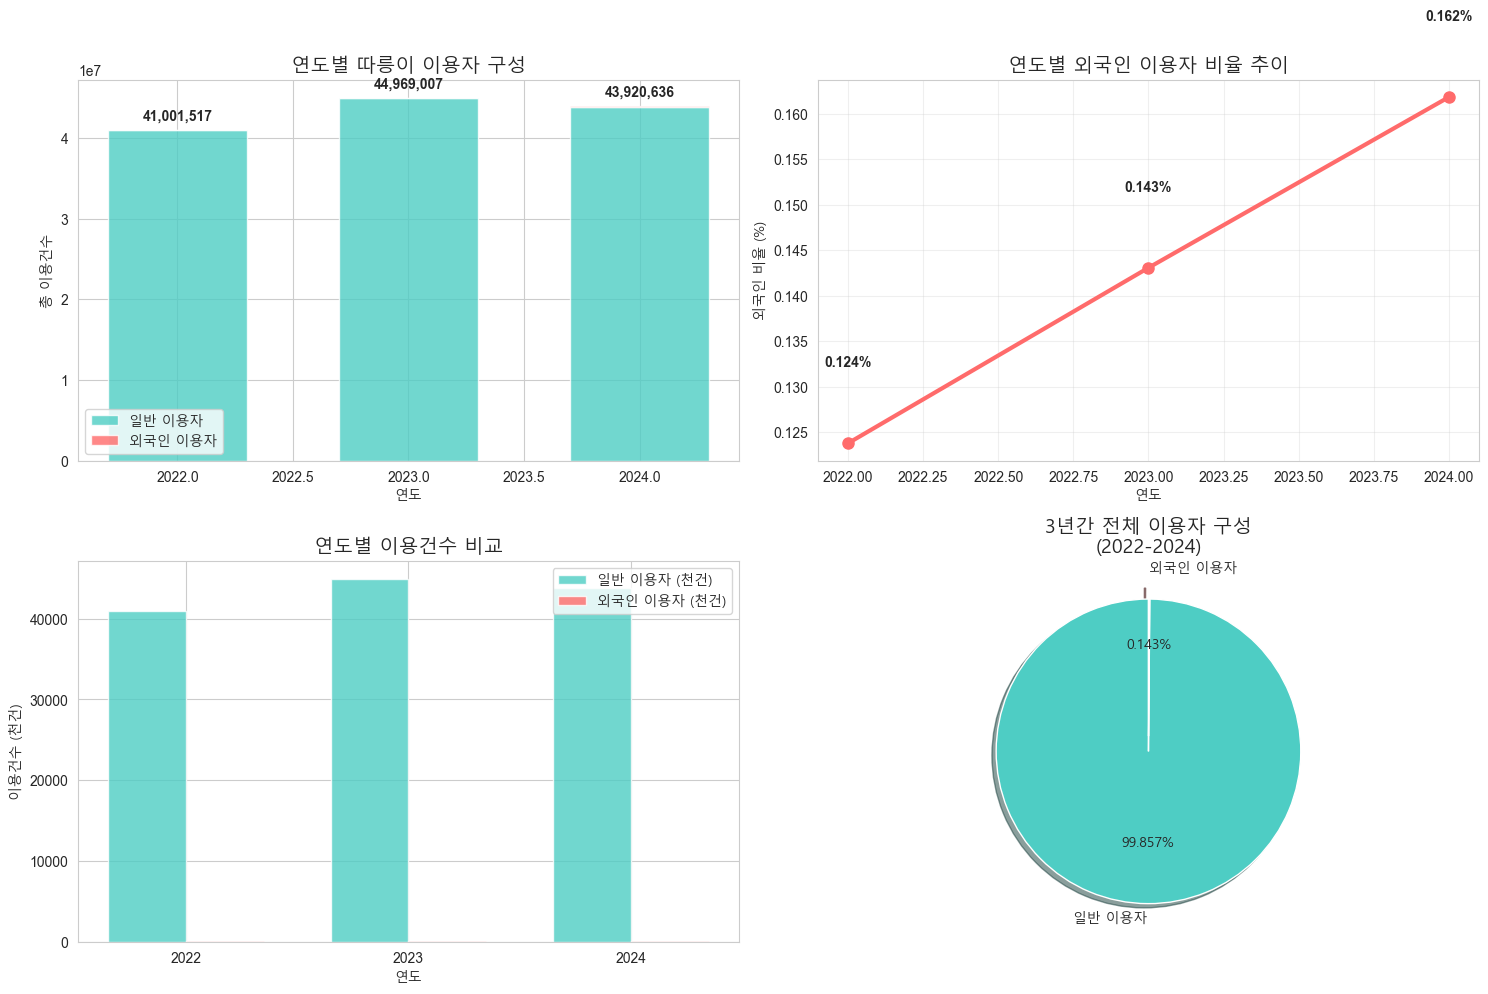


=== 3년간(2022-2024) 총 통계 ===
전체 이용건수: 129,891,160건
일반 이용자: 129,704,980건 (99.857%)
외국인 이용자: 186,180건 (0.143%)


In [9]:
# 데이터 준비
years = list(analysis_results.keys())
foreign_counts = [analysis_results[year]['foreign_total'] for year in years]
general_counts = [analysis_results[year]['general_total'] for year in years]
foreign_ratios = [analysis_results[year]['foreign_ratio'] for year in years]

plt.figure(figsize=(15, 10))

# 1. 연도별 이용자 구성 (스택 바 차트)
plt.subplot(2, 2, 1)
width = 0.6
p1 = plt.bar(years, general_counts, width, label='일반 이용자', color='#4ECDC4', alpha=0.8)
p2 = plt.bar(years, foreign_counts, width, bottom=general_counts, label='외국인 이용자', color='#FF6B6B', alpha=0.8)

plt.title('연도별 따릉이 이용자 구성', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
plt.xlabel('연도', fontproperties=korean_font_prop)
plt.ylabel('총 이용건수', fontproperties=korean_font_prop)
plt.legend(prop=korean_font_prop)

# 총 이용건수 텍스트 추가
for i, year in enumerate(years):
    total = general_counts[i] + foreign_counts[i]
    plt.text(year, total + max(general_counts) * 0.02, f'{total:,}', ha='center', va='bottom', fontweight='bold')

# 2. 외국인 비율 추이 (라인 차트)
plt.subplot(2, 2, 2)
plt.plot(years, foreign_ratios, marker='o', linewidth=3, markersize=8, color='#FF6B6B')
plt.title('연도별 외국인 이용자 비율 추이', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
plt.xlabel('연도', fontproperties=korean_font_prop)
plt.ylabel('외국인 비율 (%)', fontproperties=korean_font_prop)
plt.grid(True, alpha=0.3)

# 비율 수치 표시
for i, (year, ratio) in enumerate(zip(years, foreign_ratios)):
    plt.text(year, ratio + max(foreign_ratios) * 0.05, f'{ratio:.3f}%', ha='center', va='bottom', fontweight='bold')

# 3. 연도별 절대 수치 비교 (바 차트)
plt.subplot(2, 2, 3)
x = np.arange(len(years))
width = 0.35

plt.bar(x - width/2, [count/1000 for count in general_counts], width, label='일반 이용자 (천건)', color='#4ECDC4', alpha=0.8)
plt.bar(x + width/2, [count/1000 for count in foreign_counts], width, label='외국인 이용자 (천건)', color='#FF6B6B', alpha=0.8)

plt.title('연도별 이용건수 비교', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')
plt.xlabel('연도', fontproperties=korean_font_prop)
plt.ylabel('이용건수 (천건)', fontproperties=korean_font_prop)
plt.xticks(x, years)
plt.legend(prop=korean_font_prop)

# 4. 파이 차트 - 3년 총합
plt.subplot(2, 2, 4)
total_foreign = sum(foreign_counts)
total_general = sum(general_counts)
total_all = total_foreign + total_general

sizes = [total_general, total_foreign]
labels = ['일반 이용자', '외국인 이용자']
colors = ['#4ECDC4', '#FF6B6B']
explode = (0, 0.1)  # 외국인 비율 강조

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.3f%%', 
        shadow=True, startangle=90, textprops={'fontproperties': korean_font_prop})
plt.title('3년간 전체 이용자 구성\n(2022-2024)', fontproperties=korean_font_prop, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 3년간 총 통계 출력
print(f"\n=== 3년간(2022-2024) 총 통계 ===")
print(f"전체 이용건수: {total_all:,}건")
print(f"일반 이용자: {total_general:,}건 ({(total_general/total_all)*100:.3f}%)")
print(f"외국인 이용자: {total_foreign:,}건 ({(total_foreign/total_all)*100:.3f}%)")


## 5. 종합 분석 결과

In [10]:
print("=== 따릉이 전체 이용자 중 외국인 비율 분석 결과 ===\n")

print("1. 연도별 외국인 이용자 비율:")
for year, data in analysis_results.items():
    print(f"   {year}년: {data['foreign_ratio']:.3f}% ({data['foreign_total']:,}/{data['total_usage']:,}건)")

print("\n2. 외국인 비율 변화 추이:")
if len(analysis_results) >= 2:
    ratio_2022 = analysis_results[2022]['foreign_ratio']
    ratio_2024 = analysis_results[2024]['foreign_ratio']
    change_total = ratio_2024 - ratio_2022
    
    if change_total > 0:
        trend = "증가"
    elif change_total < 0:
        trend = "감소"
    else:
        trend = "변화없음"
    
    print(f"   2022년 → 2024년: {change_total:+.3f}%p {trend}")
    
    # 연평균 증가율 계산
    if ratio_2022 > 0:
        annual_growth = ((ratio_2024 / ratio_2022) ** (1/2) - 1) * 100
        print(f"   연평균 증가율: {annual_growth:+.1f}%")

print("\n3. 주요 인사이트:")
max_ratio_year = max(analysis_results.keys(), key=lambda x: analysis_results[x]['foreign_ratio'])
max_ratio = analysis_results[max_ratio_year]['foreign_ratio']
print(f"   - 외국인 이용 비율이 가장 높은 해: {max_ratio_year}년 ({max_ratio:.3f}%)")

# 외국인 이용자 증가량
foreign_growth_2022_2024 = foreign_counts[-1] - foreign_counts[0]
print(f"   - 2022년 대비 2024년 외국인 이용량: {foreign_growth_2022_2024:+,}건 증가")

# 전체 시장에서의 외국인 비중
avg_foreign_ratio = np.mean(foreign_ratios)
print(f"   - 3년간 평균 외국인 이용 비율: {avg_foreign_ratio:.3f}%")
print(f"   - 외국인 이용자는 전체 따릉이 시장의 소수 이용층이지만 지속적인 성장세 보임")


=== 따릉이 전체 이용자 중 외국인 비율 분석 결과 ===

1. 연도별 외국인 이용자 비율:
   2022년: 0.124% (50,761/41,001,517건)
   2023년: 0.143% (64,342/44,969,007건)
   2024년: 0.162% (71,077/43,920,636건)

2. 외국인 비율 변화 추이:
   2022년 → 2024년: +0.038%p 증가
   연평균 증가율: +14.3%

3. 주요 인사이트:
   - 외국인 이용 비율이 가장 높은 해: 2024년 (0.162%)
   - 2022년 대비 2024년 외국인 이용량: +20,316건 증가
   - 3년간 평균 외국인 이용 비율: 0.143%
   - 외국인 이용자는 전체 따릉이 시장의 소수 이용층이지만 지속적인 성장세 보임
